# Relationships Among Crime Rate, Gini Coefficient, and Median Income in US

Juhyeok Kim and Yaeji Shin

## INTRODUCTION

The over objective of this project is to analyze crime rate, gini coefficient, and median income of each State from 2019, and discover if there are factors that effect crime rate. Throughout this tutorial, we will attempt to see if there are trends among these topics by comparing data and research articles.

## DATA COLLECTION:

Data was collected using the following tools:

1. requests
2. pandas
3. numpys
4. html5lib
6. BeautifulSoup
7. matplotlib



In [ ]:
import re
import requests
from bs4 import BeautifulSoup
from os import path
try:
    import urllib
except ImportError:
    from urlparse import urlparse
import pandas
# import sys
# !{sys.executable} -m pip install lxml html5lib
import lxml
import html5lib
import matplotlib.pyplot as plt
import numpy as np
from pandas import DataFrame

In [1]:
headers = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64; rv:10.0.1) Gecko/20100101 Firefox/10.0.1'}

r = requests.get('https://www.statista.com/statistics/227249/greatest-gap-between-rich-and-poor-by-us-state/', headers=headers)

root = BeautifulSoup(r.text, 'html.parser')
table = root.find("table").prettify()

income_list = pandas.read_html(str(table), converters={"tbody": str})
income_table = pandas.DataFrame(income_list[0])
income_table.columns = ['States', 'Gini Coefficient']

In [2]:
crime = requests.get('https://www.statista.com/statistics/200445/reported-violent-crime-rate-in-the-us-states/', headers=headers)

crime_soup = BeautifulSoup(crime.text, 'html.parser')

# View the content and find the appropriate table
crime_table = crime_soup.find("table").prettify()

# Save the aforementioned table as a variable
crime_list = pandas.read_html(str(crime_table), converters={"tbody": str})
crime_list = crime_list[0]
crime_list.columns = ['States', 'Crime Rate']

data = crime_list.merge(income_table, how = "inner", left_on = "States", right_on = "States")

data

,States,Crime Rate,Gini Coefficient
0,District of Columbia,1049.0,0.51
1,Alaska,867.1,0.44
2,New Mexico,832.2,0.48
3,Tennessee,595.2,0.47
4,Arkansas,584.6,0.48
5,Louisiana,549.3,0.50
6,South Carolina,511.3,0.47
7,Alabama,510.8,0.47
8,Missouri,495.0,0.46
9,Nevada,493.8,0.47


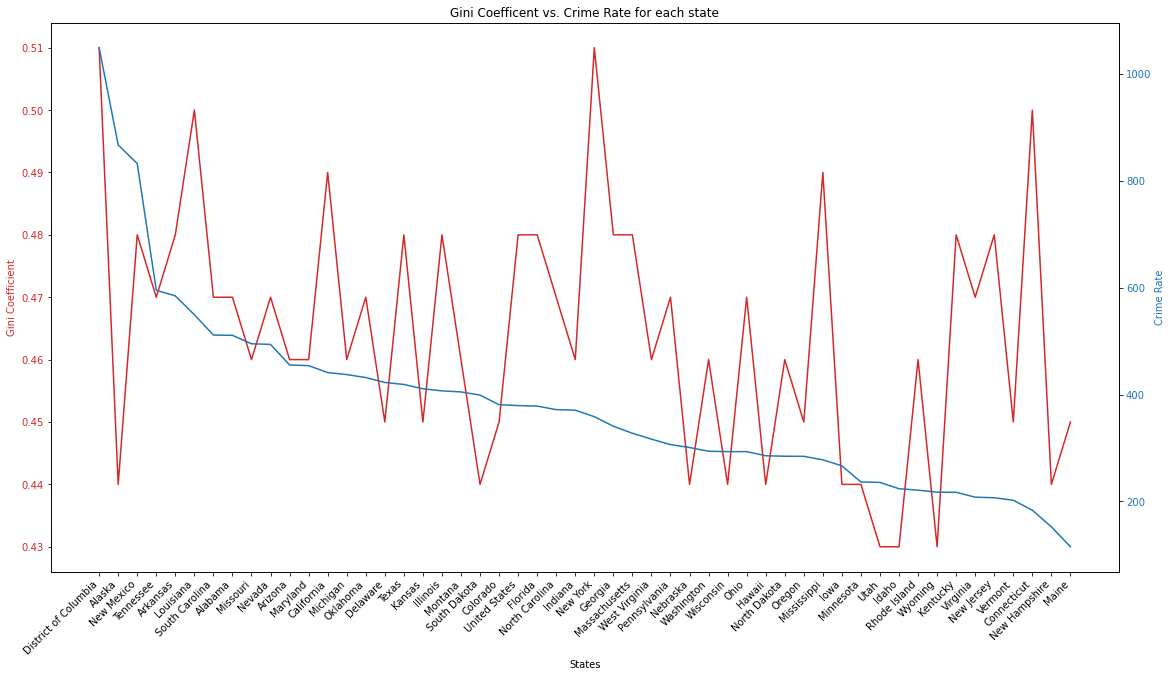

In [3]:
fig, ax1 = plt.subplots()
color = 'tab:red'

ax1.set_xlabel('States')
ax1.set_ylabel('Gini Coefficient', color=color)
ax1.plot(data['States'], data['Gini Coefficient'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Crime Rate', color=color)  # we already handled the x-label with ax1
ax2.plot(data['States'], data['Crime Rate'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.autofmt_xdate(rotation=45)
plt.gcf().set_size_inches(20, 10)
# legend, title
plt.title('Gini Coefficent vs. Crime Rate for each state')
plt.show()

Text(0.5, 1.0, 'Gini Coefficent vs. Crime Rate for each state')

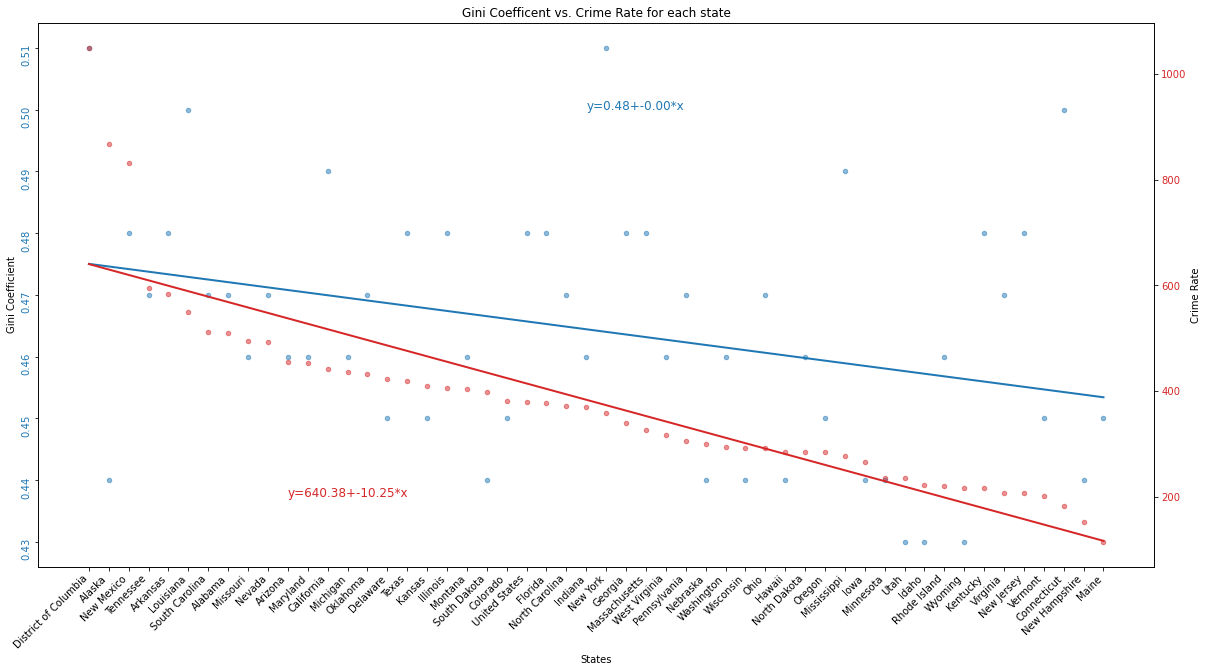

In [4]:
# Polynomial
gini_fit = np.polyfit(data.index, data['Gini Coefficient'], 1)
crime_fit = np.polyfit(data.index, data['Crime Rate'], 1)

# Scatter plot
color1 = 'tab:blue'
ax1 = data.plot(kind='scatter', x='States', y='Gini Coefficient', color=color1, alpha=0.5, figsize=(10, 7))
ax1.tick_params(labelrotation=90, axis='y', labelcolor=color1)

ax2 = ax1.twinx()
color2 = 'tab:red'
data.plot(kind='scatter', x='States', y= 'Crime Rate', color=color2, alpha=0.5, figsize=(10, 7), ax=ax2)
ax2.tick_params(axis='y', labelcolor=color2)

# Regression lines
ax1.plot(data.index, gini_fit[0] * data.index + gini_fit[1], color=color1, linewidth=2)
ax2.plot(data.index, crime_fit[0] * data.index + crime_fit[1], color=color2, linewidth=2)

# Regression equation
ax1.text(25, 0.5, 'y={:.2f}+{:.2f}*x'.format(gini_fit[1], gini_fit[0]), color=color1, size=12)
ax2.text(10, 200, 'y={:.2f}+{:.2f}*x'.format(crime_fit[1], crime_fit[0]), color=color2, size=12)

# fig.autofmt_xdate(rotation=45)
# ax1.set_xticklabels(xlabels, rotation=45, ha='right')
# plt.xticks(rotation=45)
plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')
plt.gcf().set_size_inches(20, 10)
# fig.autofmt_xdate(rotation=45)

# legend, title
plt.title('Gini Coefficent vs. Crime Rate for each state')

In [5]:
median_income = requests.get('https://www.statista.com/statistics/233170/median-household-income-in-the-united-states-by-state/', headers=headers)

income_soup = BeautifulSoup(median_income.text, 'html.parser')

# View the content and find the appropriate table
income_table = income_soup.find("table").prettify()

income_list = pandas.read_html(str(income_table), converters={"tbody": str})
income_list = income_list[0]
income_list.columns = ['States', 'Median Income']
# income_list

# data comparing crime rate and median income
data2 = crime_list.merge(income_list, how = "inner", left_on = "States", right_on = "States")
data2

,States,Crime Rate,Median Income
0,District of Columbia,1049.0,93111
1,Alaska,867.1,78394
2,New Mexico,832.2,53113
3,Tennessee,595.2,56627
4,Arkansas,584.6,54539
5,Louisiana,549.3,51707
6,South Carolina,511.3,62028
7,Alabama,510.8,56200
8,Missouri,495.0,60597
9,Nevada,493.8,70906


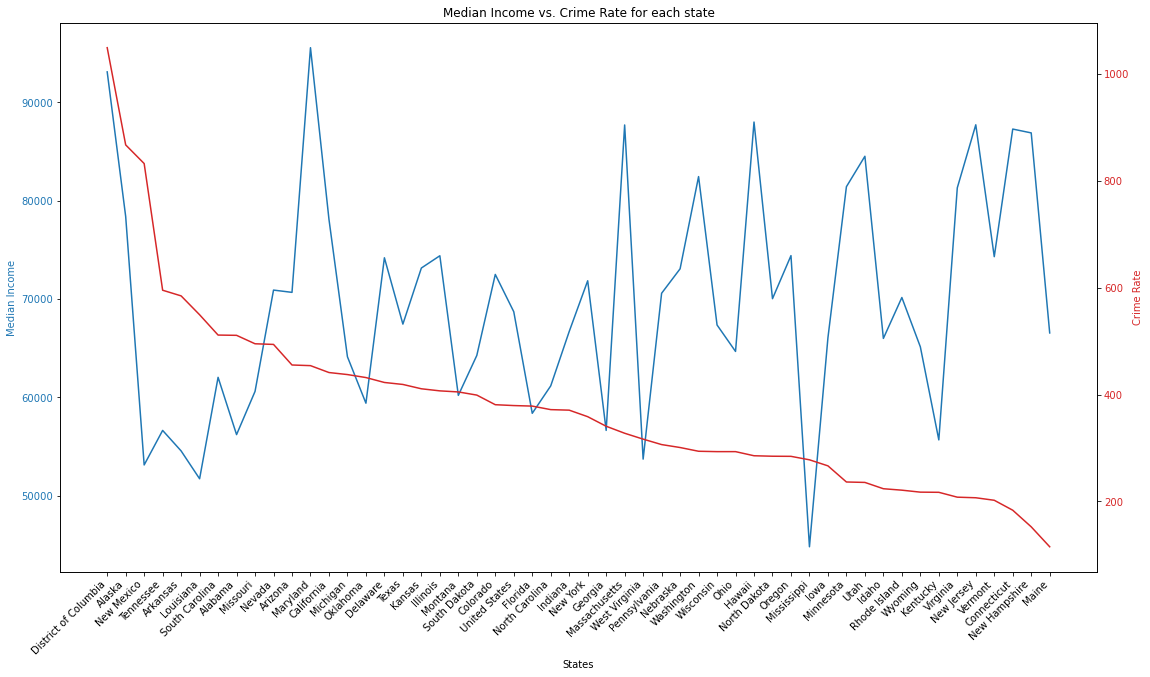

In [6]:
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('States')
ax1.set_ylabel('Median Income', color=color)
ax1.plot(data2['States'], data2['Median Income'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Crime Rate', color=color)  # we already handled the x-label with ax1
ax2.plot(data2['States'], data2['Crime Rate'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.autofmt_xdate(rotation=45)
plt.gcf().set_size_inches(20, 10)
# legend, title
plt.title('Median Income vs. Crime Rate for each state')
plt.show()

Text(0.5, 1.0, 'Median Income vs. Crime Rate for each state')

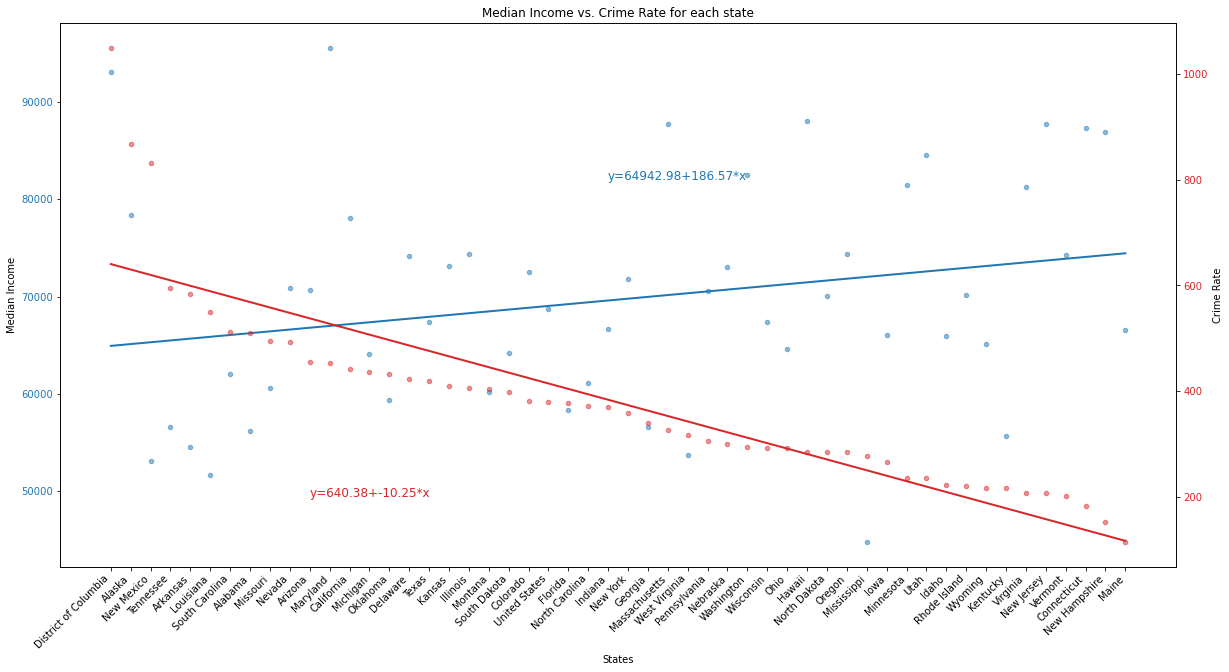

In [7]:
# Polynomial
income_fit = np.polyfit(data2.index, data2['Median Income'], 1)
crime_fit = np.polyfit(data2.index, data2['Crime Rate'], 1)

# Scatter plot
color1 = 'tab:blue'
ax1 = data2.plot(kind='scatter', x='States', y='Median Income', color=color1, alpha=0.5, figsize=(10, 7))
ax1.tick_params(axis='y', labelcolor=color1)

ax2 = ax1.twinx()
color2 = 'tab:red'
data2.plot(kind='scatter', x='States', y= 'Crime Rate', color=color2, alpha=0.5, figsize=(10, 7), ax=ax2)
ax2.tick_params(axis='y', labelcolor=color2)

# Regression lines
ax1.plot(data2.index, income_fit[0] * data2.index + income_fit[1], color=color1, linewidth=2)
ax2.plot(data2.index, crime_fit[0] * data2.index + crime_fit[1], color=color2, linewidth=2)

# Regression equation
ax2.text(25, 800, 'y={:.2f}+{:.2f}*x'.format(income_fit[1], income_fit[0]), color=color1, size=12)
ax2.text(10, 200, 'y={:.2f}+{:.2f}*x'.format(crime_fit[1], crime_fit[0]), color=color2, size=12)
plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')
plt.gcf().set_size_inches(20, 10)

# legend, title
plt.title('Median Income vs. Crime Rate for each state')

In [8]:
poverty = requests.get('https://worldpopulationreview.com/state-rankings/poverty-rate-by-state', headers=headers)

poverty_soup = BeautifulSoup(poverty.text, 'html.parser')

# View the content and find the appropriate table
poverty_table = poverty_soup.find("table").prettify()
poverty_list = pandas.read_html(str(poverty_table), converters={"tbody": str})
poverty_list = poverty_list[0]
poverty_list = poverty_list.drop(['Poverty'], axis=1)
poverty_list.columns = ['States', 'Poverty']
poverty_list['Poverty'] = poverty_list['Poverty'].str.replace(r'%', '')
poverty_list['Poverty'] = poverty_list['Poverty'].astype(float)

# data comparing crime rate and median income
data3 = crime_list.merge(poverty_list, how = "inner", left_on = "States", right_on = "States")
data3


,States,Crime Rate,Poverty
0,Alaska,867.1,10.61
1,New Mexico,832.2,19.57
2,Tennessee,595.2,15.17
3,Arkansas,584.6,16.79
4,Louisiana,549.3,18.91
5,South Carolina,511.3,14.79
6,Alabama,510.8,16.90
7,Missouri,495.0,13.58
8,Nevada,493.8,12.53
9,Arizona,455.3,14.80


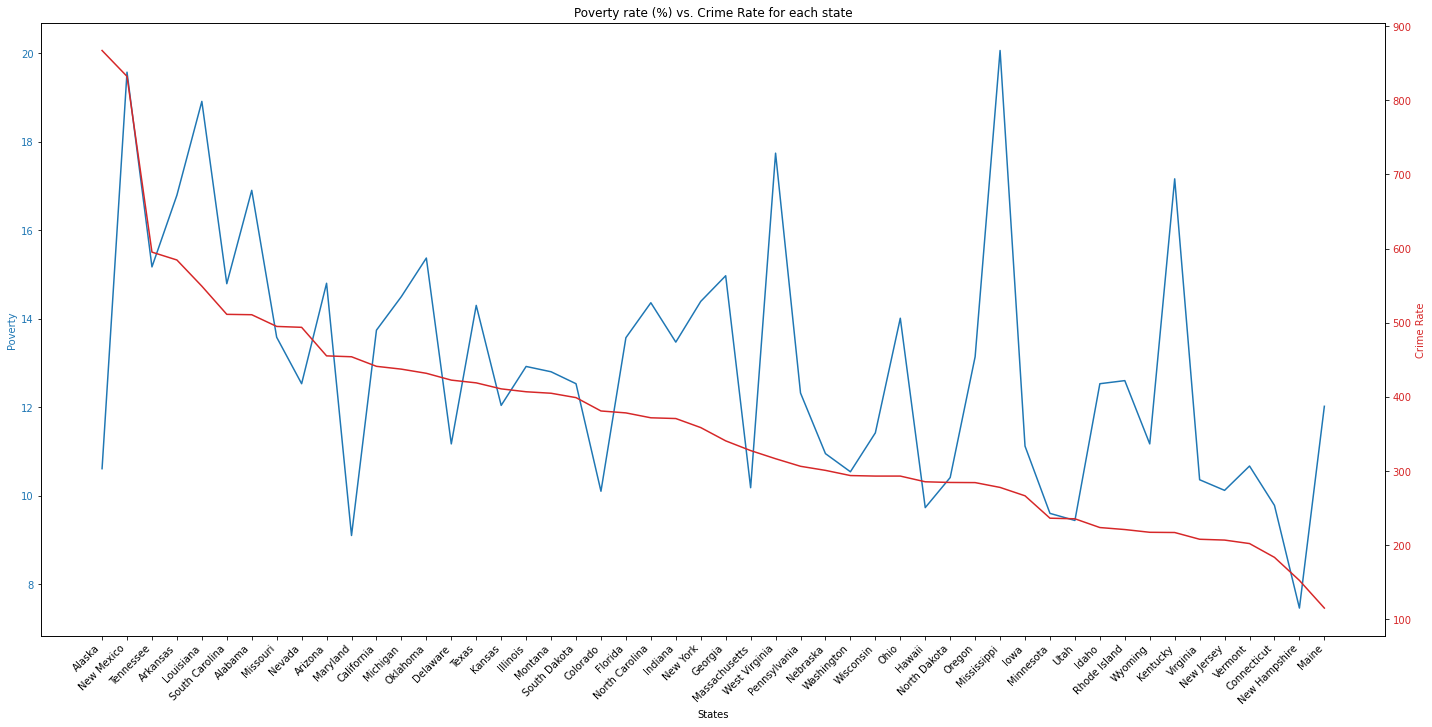

In [9]:
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('States')
ax1.set_ylabel('Poverty', color=color)
ax1.plot(data3['States'], data3['Poverty'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Crime Rate', color=color)  # we already handled the x-label with ax1
ax2.plot(data3['States'], data3['Crime Rate'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.autofmt_xdate(rotation=45)
plt.gcf().set_size_inches(20, 10)
fig.tight_layout()  # otherwise the right y-label is slightly clipped

# legend, title
plt.title('Poverty rate (%) vs. Crime Rate for each state')
plt.show()

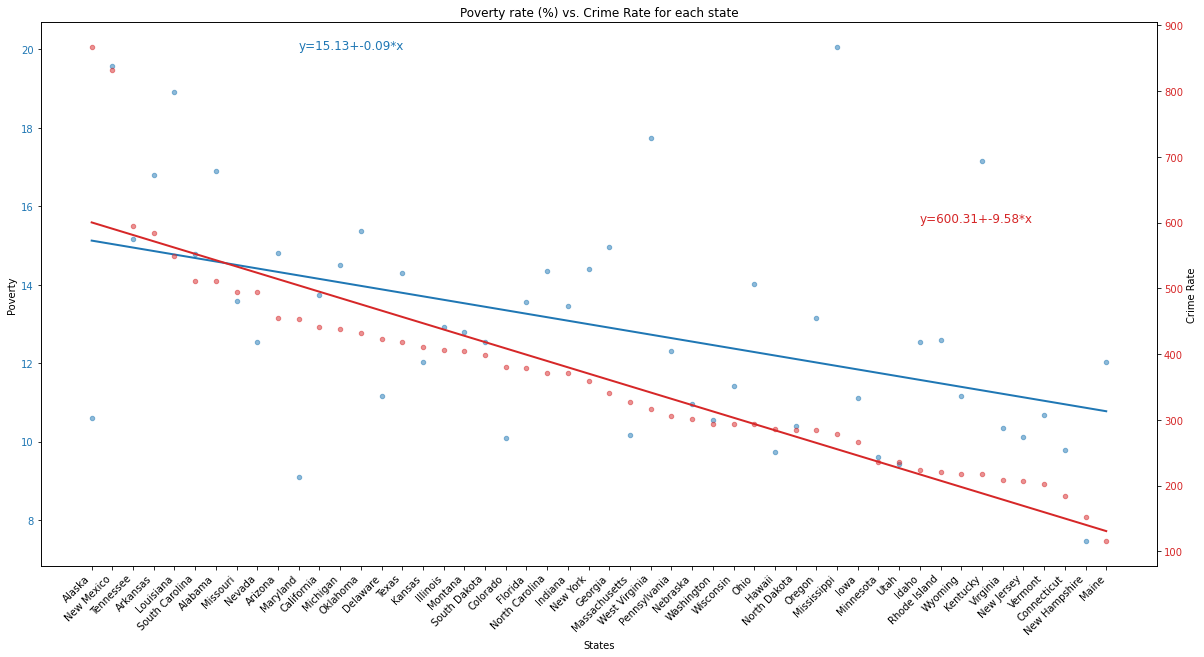

In [10]:
# Polynomial
poverty_fit = np.polyfit(data3.index, data3['Poverty'], 1)
crime_fit = np.polyfit(data3.index, data3['Crime Rate'], 1)

# Scatter plot
color1 = 'tab:blue'
ax1 = data3.plot(kind='scatter', x='States', y='Poverty', color=color1, alpha=0.5, figsize=(10, 7))
ax1.tick_params(axis='y', labelcolor=color1)

ax2 = ax1.twinx()
color2 = 'tab:red'
data3.plot(kind='scatter', x='States', y= 'Crime Rate', color=color2, alpha=0.5, figsize=(10, 7), ax=ax2)
ax2.tick_params(axis='y', labelcolor=color2)

# Regression lines
plt.xticks(rotation=70)
ax1.plot(data3.index, poverty_fit[0] * data3.index + poverty_fit[1], color=color1, linewidth=2)
ax2.plot(data3.index, crime_fit[0] * data3.index + crime_fit[1], color=color2, linewidth=2)

# Regression equation
ax1.text(10, 20, 'y={:.2f}+{:.2f}*x'.format(poverty_fit[1], poverty_fit[0]), color=color1, size=12)
ax2.text(40, 600, 'y={:.2f}+{:.2f}*x'.format(crime_fit[1], crime_fit[0]), color=color2, size=12)
plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')
plt.gcf().set_size_inches(20, 10)

# legend, title
plt.title('Poverty rate (%) vs. Crime Rate for each state')
plt.show()